- Chargement des données

In [1]:
import sqlite3
import pandas as pd


# Connexion à la base de données SQLite
conn = sqlite3.connect('my_database.db')
df_f_final= pd.read_sql('SELECT * FROM tab_classi', conn)


DatabaseError: Execution failed on sql 'SELECT * FROM tab_classi': no such table: tab_classi

In [2]:
import sqlite3

# Connexion à la base de données SQLite
conn = sqlite3.connect('my_database.db')

# Création d'un curseur
cursor = conn.cursor()

# Exécution d'une requête pour récupérer les noms de tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Récupération des résultats
tables = cursor.fetchall()

# Affichage des noms de table
print("Tables dans la base de données :")
for table in tables:
    print(table[0])

# Fermeture de la connexion
conn.close()


Tables dans la base de données :


In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Encoder la colonne 'FLAG_I_S'
le_flag = LabelEncoder()
df_f_final['FLAG_I_S_Encoded'] = le_flag.fit_transform(df_f_final['FLAG_I_S'].astype(str))

print("\nEncodage de 'FLAG_I_S' :")
print(df_f_final[['FLAG_I_S', 'FLAG_I_S_Encoded']].head())


Encodage de 'FLAG_I_S' :
     FLAG_I_S  FLAG_I_S_Encoded
0  I                          0
1  I                          0
2  I                          0
3  I                          0
4  I                          0


- Corrélation

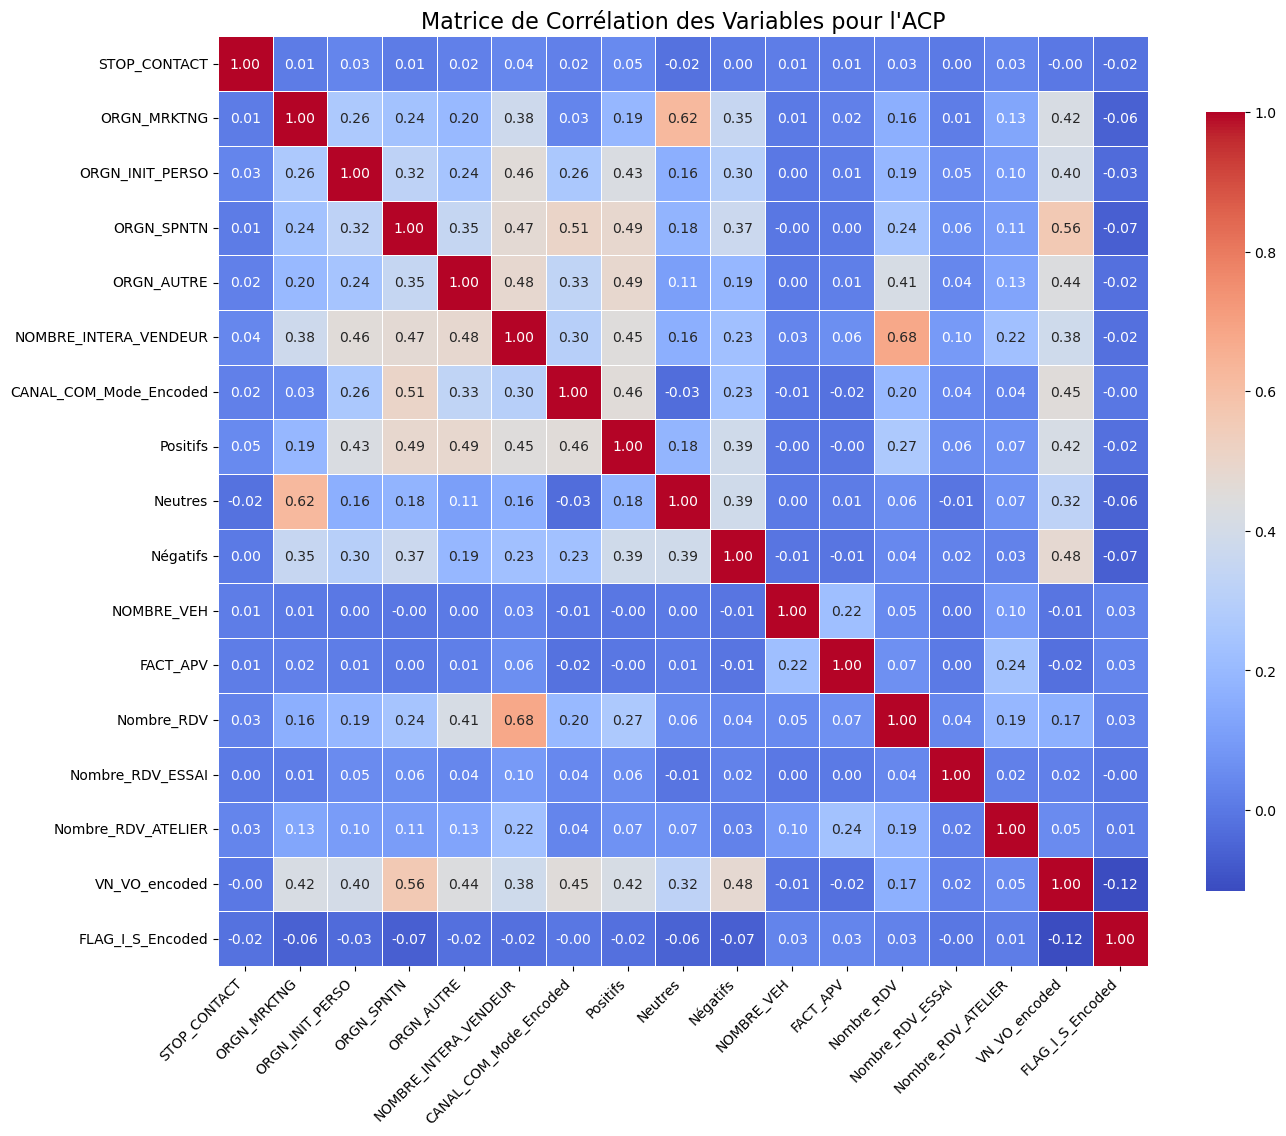

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df_f_final et est déjà chargé
# Si ce n'est pas le cas, chargez-le avec pd.read_csv ou une autre méthode appropriée
# Exemple :
# df_f_final = pd.read_csv('votre_fichier.csv')

# Liste des variables pour l'ACP
variables_pca = [
    'STOP_CONTACT',
    'ORGN_MRKTNG',
    'ORGN_INIT_PERSO',
    'ORGN_SPNTN',
    'ORGN_AUTRE',
    'NOMBRE_INTERA_VENDEUR',
    'CANAL_COM_Mode_Encoded',
    'Positifs',
    'Neutres',
    'Négatifs',
    'NOMBRE_VEH',
    'FACT_APV',
    'Nombre_RDV',
    'Nombre_RDV_ESSAI',
    'Nombre_RDV_ATELIER',
    'VN_VO_encoded',
    'FLAG_I_S_Encoded'
]

# Vérifier que toutes les colonnes existent dans le DataFrame
missing_cols = [col for col in variables_pca if col not in df_f_final.columns]
if missing_cols:
    print("\nAttention : Les colonnes suivantes sont manquantes dans df_f_final et ne seront pas incluses dans la matrice de corrélation :")
    print(missing_cols)

# Filtrer les colonnes qui existent
variables_pca_present = [col for col in variables_pca if col in df_f_final.columns]

# Sélectionner les variables pour la corrélation
df_corr = df_f_final[variables_pca_present]

# Calculer la matrice de corrélation
matrice_corr = df_corr.corr()

 

# Créer la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    matrice_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)
plt.title('Matrice de Corrélation des Variables pour l\'ACP', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix.pdf')



- ACP , Cercle de corrélation

Aperçu du DataFrame df_f_final:
   ID_INDIVIDU            DATE_CREA             DATE_MAJ  STOP_CONTACT  \
0          1.0  2015-03-31 00:45:15  2018-11-30 17:12:14           0.0   
1          2.0  2015-03-31 00:45:15  2016-11-10 17:27:46           1.0   
2          3.0  2015-03-31 00:45:15  2024-04-10 11:51:50           1.0   
3          4.0  2015-03-31 00:45:15  2015-03-31 00:48:57           0.0   
4          5.0  2015-03-31 00:45:15  2017-12-13 18:21:38           0.0   

     FLAG_I_S        SEXE     CANAL  ORGN_MRKTNG  ORGN_INIT_PERSO  ORGN_SPNTN  \
0  I           0           Inconnue          1.0              1.0         1.0   
1  I           1                 VN          1.0              1.0         1.0   
2  I           1                 VN          1.0              1.0         1.0   
3  I           1                 VN          1.0              0.0         0.0   
4  I           2                 VN          1.0              1.0         1.0   

   ...  Neutres  Négatifs  NOMBRE_VE

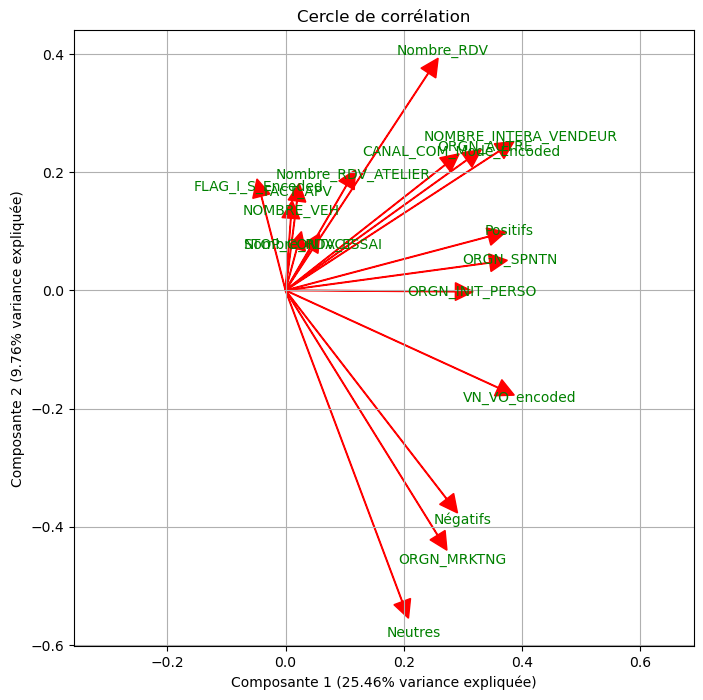

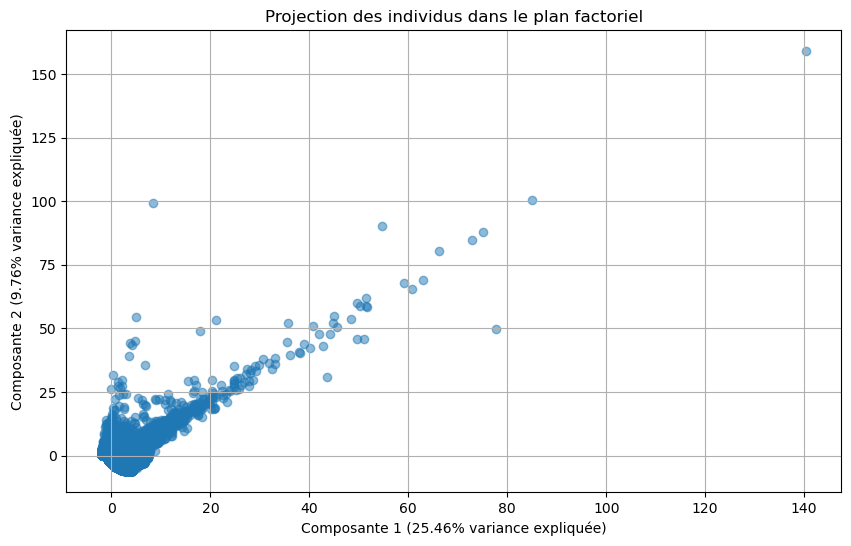


Coefficients des variables pour les deux premières composantes :
                        Composante 1  Composante 2
STOP_CONTACT                0.019091      0.070471
ORGN_MRKTNG                 0.257268     -0.414138
ORGN_INIT_PERSO             0.287395     -0.002049
ORGN_SPNTN                  0.345633      0.046776
ORGN_AUTRE                  0.306700      0.220537
NOMBRE_INTERA_VENDEUR       0.361349      0.235478
CANAL_COM_Mode_Encoded      0.270174      0.212432
Positifs                    0.343490      0.090979
Neutres                     0.197495     -0.526624
Négatifs                    0.272642     -0.352839
NOMBRE_VEH                  0.009020      0.121996
FACT_APV                    0.019402      0.151161
Nombre_RDV                  0.241741      0.367670
Nombre_RDV_ESSAI            0.042142      0.070265
Nombre_RDV_ATELIER          0.103262      0.177800
VN_VO_encoded               0.359767     -0.164756
FLAG_I_S_Encoded           -0.040835      0.159387


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df_f_final et est déjà chargé
# Si ce n'est pas le cas, chargez-le avec pd.read_csv ou une autre méthode appropriée
# df_f_final = pd.read_csv('votre_fichier.csv')

print("Aperçu du DataFrame df_f_final:")
print(df_f_final.head())

print("\nTypes de données dans df_f_final:")
print(df_f_final.dtypes)

# 1. Encoder la colonne 'FLAG_I_S'
le_flag = LabelEncoder()
df_f_final['FLAG_I_S_Encoded'] = le_flag.fit_transform(df_f_final['FLAG_I_S'].astype(str))

print("\nEncodage de 'FLAG_I_S' :")
print(df_f_final[['FLAG_I_S', 'FLAG_I_S_Encoded']].head())

# 2. Sélection des variables pour l'ACP
variables_pca = [
    'STOP_CONTACT',
    'ORGN_MRKTNG',
    'ORGN_INIT_PERSO',
    'ORGN_SPNTN',
    'ORGN_AUTRE',
    'NOMBRE_INTERA_VENDEUR',
    'CANAL_COM_Mode_Encoded',
    'Positifs',
    'Neutres',
    'Négatifs',
    'NOMBRE_VEH',
    'FACT_APV',
    'Nombre_RDV',
    'Nombre_RDV_ESSAI',
    'Nombre_RDV_ATELIER',
    'VN_VO_encoded',
    'FLAG_I_S_Encoded'
]

# Vérifier que toutes les colonnes existent
missing_cols = [col for col in variables_pca if col not in df_f_final.columns]
if missing_cols:
    print("\nAttention : Les colonnes suivantes sont manquantes dans df_f_final et ne seront pas incluses dans l'ACP :")
    print(missing_cols)

# Filtrer les colonnes qui existent
variables_pca_present = [col for col in variables_pca if col in df_f_final.columns]

df_selected = df_f_final[variables_pca_present].copy()
print("\nAperçu des variables sélectionnées pour l'ACP:")
print(df_selected.head())

# 3. Gérer les valeurs manquantes
print("\nValeurs manquantes dans les variables sélectionnées avant traitement:")
print(df_selected.isnull().sum())

# Remplacer les NaN par 0
df_selected = df_selected.fillna(0)

print("\nValeurs manquantes dans les variables sélectionnées après remplacement:")
print(df_selected.isnull().sum())

# 4. Standardisation des données
X = df_selected.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPrésence de NaN dans X_scaled :", np.isnan(X_scaled).any())

# 5. Réalisation de l'ACP

# a. Effectuer l'ACP complète pour analyser la variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_full = pca_full.explained_variance_ratio_ * 100
cumulative_variance_full = np.cumsum(explained_variance_full)

print("\nVariance expliquée par chaque composante (ACP complète) :")
for i, var in enumerate(explained_variance_full):
    print(f"Composante {i+1} : {var:.2f}%")

print("\nVariance cumulée (ACP complète) :")
for i, cum_var in enumerate(cumulative_variance_full):
    print(f"Composante {i+1} : {cum_var:.2f}%")

# b. Choisir le nombre de composantes (par exemple, 2)
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pcs = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100

print("\nVariance expliquée par les deux premières composantes :")
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1} : {var:.2f}%")

# 6. Visualisation des résultats

# a. Cercle de corrélation
plt.figure(figsize=(8,8))
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)
feature_names = df_selected.columns.tolist()

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(x*1.1, y*1.1, feature_names[i], color='green', ha='center', va='center')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'Composante 1 ({explained_variance[0]:.2f}% variance expliquée)')
plt.ylabel(f'Composante 2 ({explained_variance[1]:.2f}% variance expliquée)')
plt.title('Cercle de corrélation')  # Correction de plt.tit à plt.title
plt.grid()
plt.axis('equal')
plt.show()

# b. Projection des individus
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel(f'Composante 1 ({explained_variance[0]:.2f}% variance expliquée)')
plt.ylabel(f'Composante 2 ({explained_variance[1]:.2f}% variance expliquée)')
plt.title('Projection des individus dans le plan factoriel')  # Correction de plt.tit à plt.title
plt.grid()
plt.show()

# 7. Interprétation des résultats

# Coefficients des variables
loadings = pd.DataFrame(pcs.T, index=feature_names, columns=[f'Composante {i+1}' for i in range(n_components)])
print("\nCoefficients des variables pour les deux premières composantes :")
print(loadings)


- RandomForest

K-MEANS

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation
X_scaled = scaler.fit_transform(df_corr)

# Optionnel : Convertir en DataFrame pour une meilleure lisibilité
df_scaled = pd.DataFrame(X_scaled, columns=df_corr.columns)


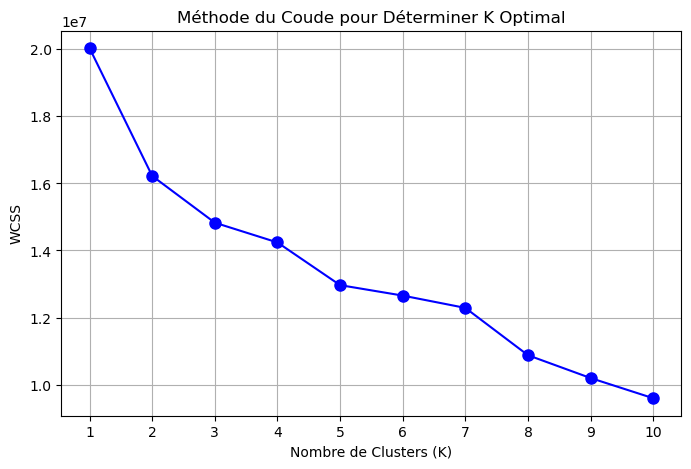

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Tracer la Méthode du Coude
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('WCSS')
plt.title('Méthode du Coude pour Déterminer K Optimal')
plt.xticks(K)
plt.grid(True)
plt.show()


In [29]:
# Définir le nombre de clusters optimal (exemple : K=3)
optimal_k = 4

# Initialiser et entraîner K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Ajouter les étiquettes de cluster au DataFrame original
df_f_final['Cluster'] = cluster_labels

print("\nDistribution des clusters :")
print(df_f_final['Cluster'].value_counts())



Distribution des clusters :
Cluster
1    552523
3    265083
0    222615
2    138021
Name: count, dtype: int64


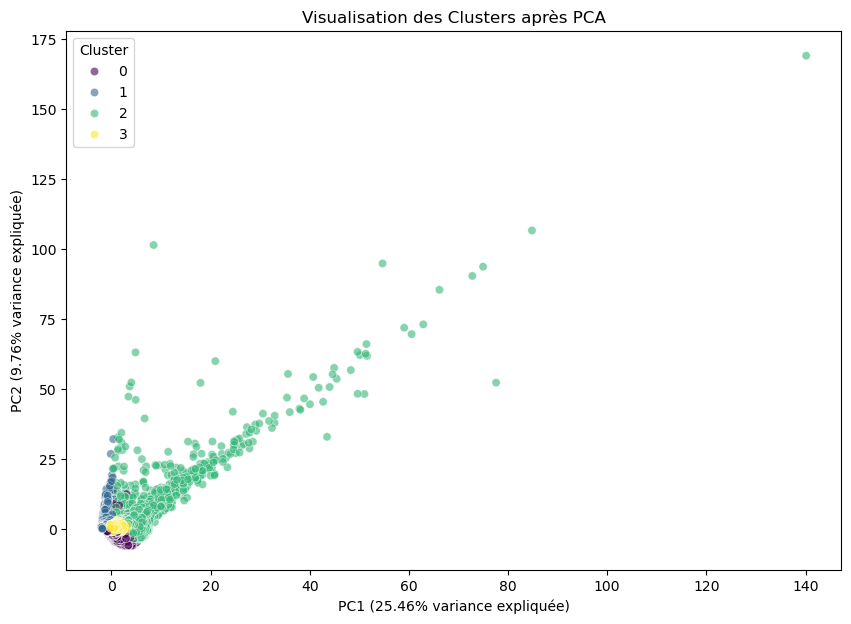

In [30]:
from sklearn.decomposition import PCA

# Réduire à 2 dimensions pour la visualisation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les composantes PCA au DataFrame
df_f_final['PC1'] = X_pca[:, 0]
df_f_final['PC2'] = X_pca[:, 1]

# Tracer les clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='viridis',
    data=df_f_final,
    alpha=0.6
)
plt.title('Visualisation des Clusters après PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance expliquée)')
plt.legend(title='Cluster')
plt.show()


C:\Users\ajebali\AppData\Local\Temp\ipykernel_17920\703524718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


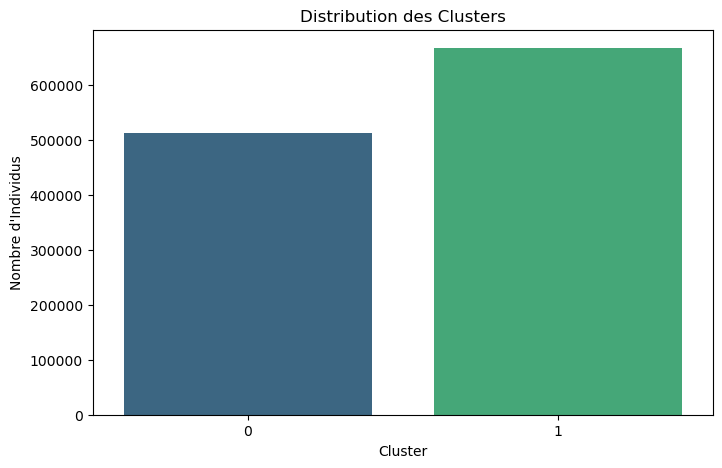

In [25]:
# Compter le nombre d'éléments dans chaque cluster
cluster_counts = df_f_final['Cluster'].value_counts()

# Tracer un diagramme à barres
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'Individus')
plt.title('Distribution des Clusters')
plt.show()


### Application de K-MEANS sur les variables et pas l'ACP

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Supposons que df_f_final est déjà chargé
# Vérifier l'existence des colonnes nécessaires et préparer les données
variables_pca = [
    'STOP_CONTACT', 'ORGN_MRKTNG', 'ORGN_INIT_PERSO', 'ORGN_SPNTN', 'ORGN_AUTRE',
    'NOMBRE_INTERA_VENDEUR', 'CANAL_COM_Mode_Encoded', 'Positifs', 'Neutres', 'Négatifs',
    'NOMBRE_VEH', 'FACT_APV', 'Nombre_RDV', 'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER', 
    'VN_VO_encoded', 'FLAG_I_S_Encoded'
]

df_f_final = df_f_final.dropna(subset=variables_pca)  # Optionnel: supprimer les lignes avec des valeurs manquantes
X = df_f_final[variables_pca].values  # Création d'une matrice de features

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


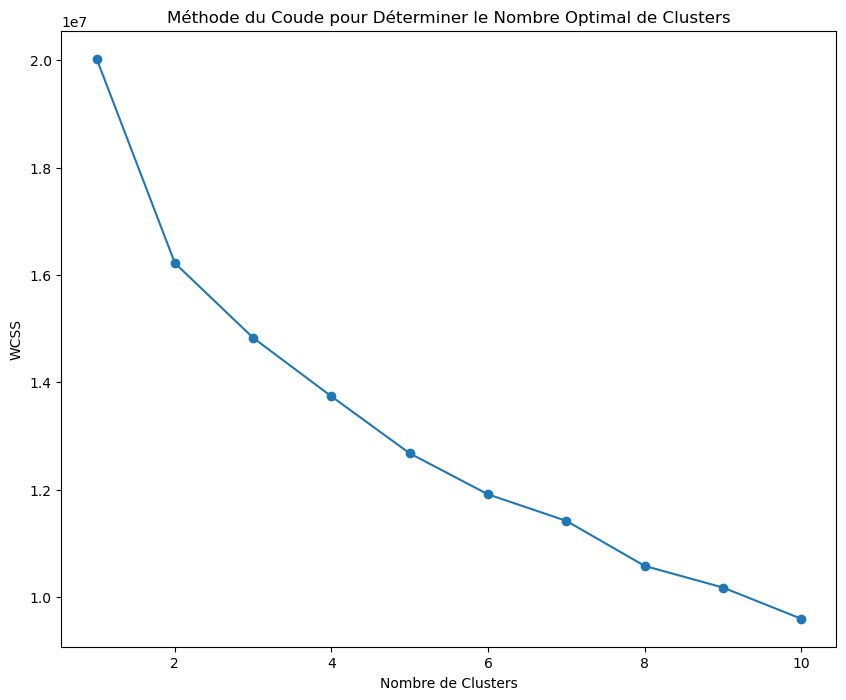

In [27]:
# Détermination du nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.show()

# Appliquer K-Means avec le nombre de clusters choisi (par exemple, k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df_f_final['Cluster'] = cluster_labels  # Ajouter les labels de clusters au DataFrame original


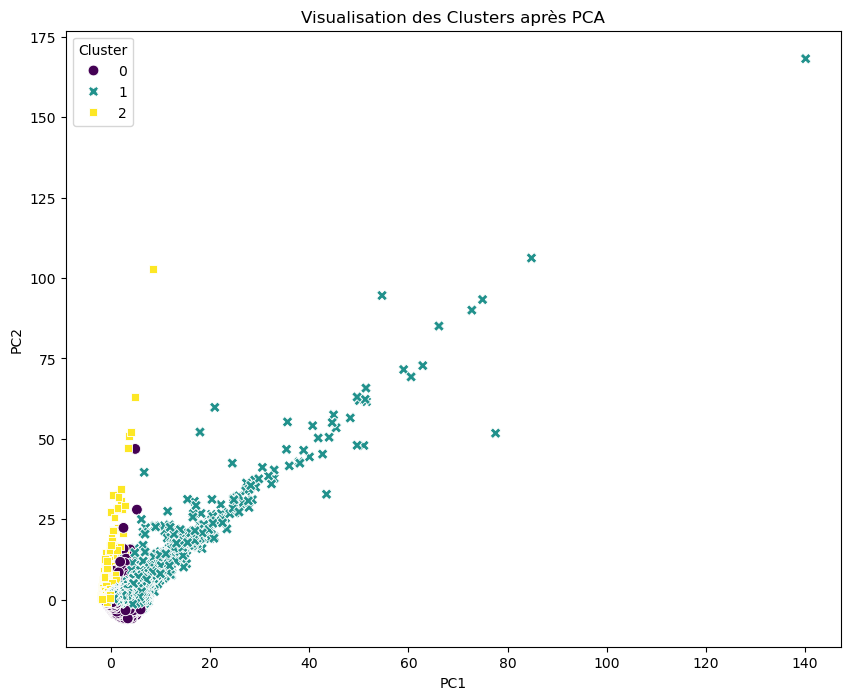

TypeError: agg function failed [how->mean,dtype->object]

In [28]:
# Visualisation des clusters en utilisant PCA pour la réduction de dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_f_final['Cluster'], palette='viridis', style=df_f_final['Cluster'], s=60)
plt.title('Visualisation des Clusters après PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

# Analyse des caractéristiques des clusters
cluster_groups = df_f_final.groupby('Cluster').mean()
print(cluster_groups)
